# Random Walk Generation

$$\frac{S_{t+dt}-S_t}{S_t} = (r+\sigma \lambda)dt + \sigma \sqrt{dt} \xi_t$$

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import pandas as pd
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, step_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/step_per_year
    n_steps = int(n_years * step_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 *(1+rets).cumprod()
    return prices

In [28]:
p = gbm(10, n_scenarios=3)

In [29]:
p.shape

(120, 3)

In [30]:
p.head()

,0,1,2
0,101.156426,99.130179,100.970579
1,106.094291,90.971072,101.077149
2,105.659906,93.653670,109.270676
3,107.792120,98.876257,114.005498
4,102.356418,101.709031,111.904165


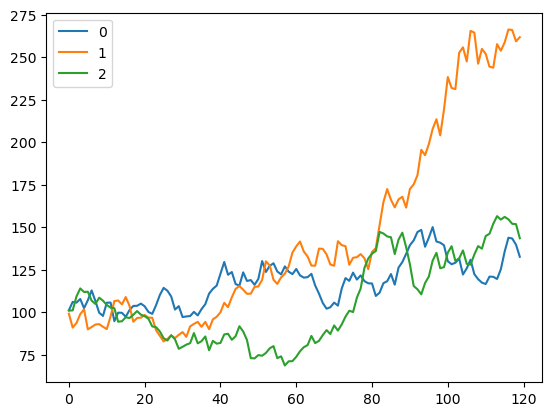

In [31]:
p.plot()
plt.show()

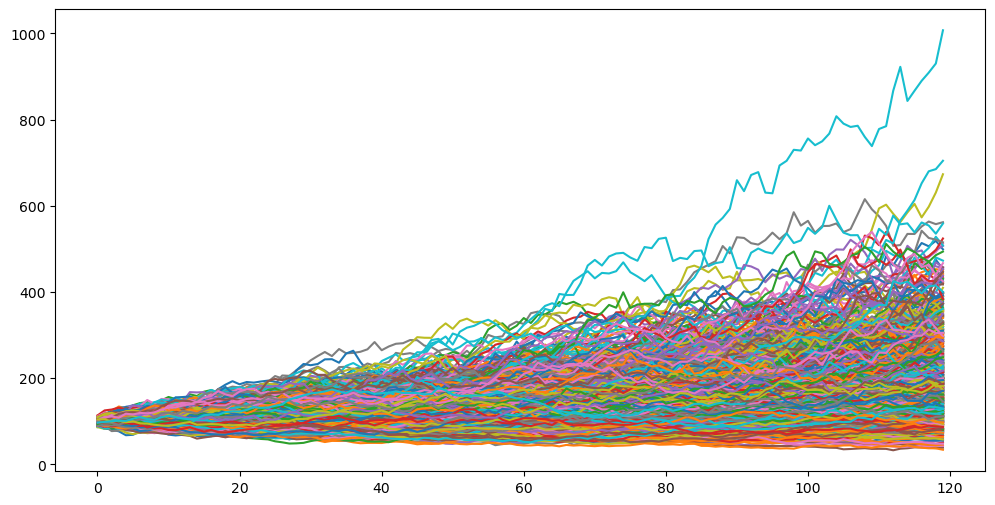

In [32]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6),legend=False)
plt.show()

In [33]:
def gbm_0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, step_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/step_per_year
    n_steps = int(n_years * step_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 *(1+rets).cumprod()
    return prices

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, step_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/step_per_year
    n_steps = int(n_years * step_per_year)
    rets_plus_1 = np.random.normal(loc= (1 + mu*dt), scale = (sigma * np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [34]:
%timeit gbm_0(n_years = 5, n_scenarios= 1000)

1.14 ms ± 69.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [35]:
%timeit gbm_1(n_years = 5, n_scenarios= 1000)

1.09 ms ± 39.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


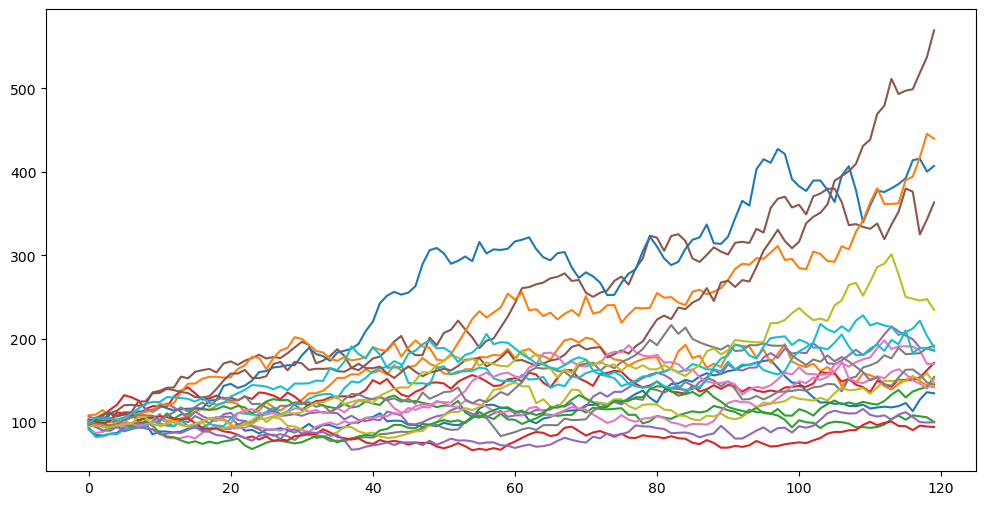

In [36]:
gbm(n_years = 10, n_scenarios= 20).plot(legend=False, figsize=(12,6))
plt.show()

In [37]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, step_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/step_per_year
    n_steps = int(n_years * step_per_year)
    rets_plus_1 = np.random.normal(loc= (1 + mu*dt), scale = (sigma * np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [38]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,103.104505,99.653526,101.399306,104.480212,97.548486,88.675464,103.117341,98.967897,104.944832,103.198206
2,112.929455,96.782903,103.554430,102.986589,94.498517,87.840434,98.644549,103.489222,109.910664,92.704985
3,107.365534,97.115797,103.157552,107.738807,91.765554,88.420048,98.501945,107.954743,101.313538,93.839294
4,111.939627,96.660061,105.056994,104.722512,91.454332,86.227101,95.841373,110.561880,97.999203,93.965598
